In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import itertools as it

In [12]:
dataset = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [13]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [17]:
def lin_reg_eq_print(salary_discrim_cols, data):
    input_cols = data[salary_discrim_cols]
    salary = data['Salary']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(salary_discrim_cols, regr_sd.coef_, regr_sd.intercept_))

In [18]:
lin_reg_eq_print(salary_discrim_cols, dataset)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.146547255616


In [19]:
def lin_reg_wrt_focus(salary_discrim_cols, data, focus='Salary'):
    input_cols = data[salary_discrim_cols]
    focus_output = data[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [20]:
print('R^2 score for equation using all columns: {}'
      .format(lin_reg_wrt_focus(salary_discrim_cols, dataset)))

R^2 score for equation using all columns: 0.8547180674410969


In [21]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [24]:
combos = get_combos(salary_discrim_cols)

In [26]:
def all_combo_scores(combos, data, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), data, focus)] = n
    return combo_scores

In [27]:
combo_scores = all_combo_scores(combos, dataset)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335425, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153612, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274631, ('Rank',)),
 (0.6311597502907434, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180406, ('Sex', 'Year', 

In [ ]:
The selection with the best  score is: Sex, Rank, Year, Degree, YSdeg: 0.85471806744109691 (as seen above)

However, although including all of the columns produces the highest  score, there are two dominant factors: Year and Rank. 
Just these two factors taken together have a score of 0.84364809332645985.

It is worth noting that Sex on its own has a score very close to zero (0.063898925832880038), 
indicating that it has no direct influence on salary.

In [29]:
num_by_sex = dataset.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(num_by_sex[0], num_by_sex[1]))

Num men: 38
Num women: 14


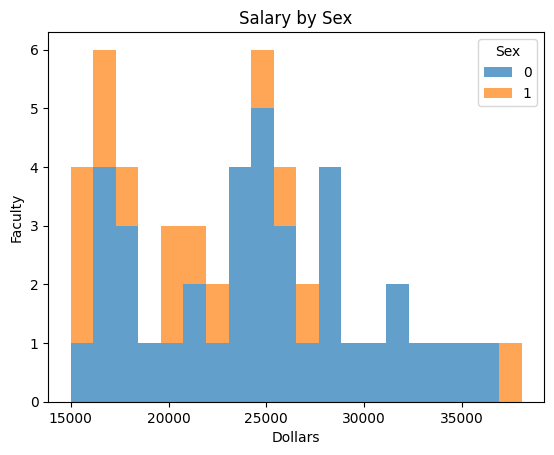

In [31]:
dataset.pivot_table(index=dataset.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

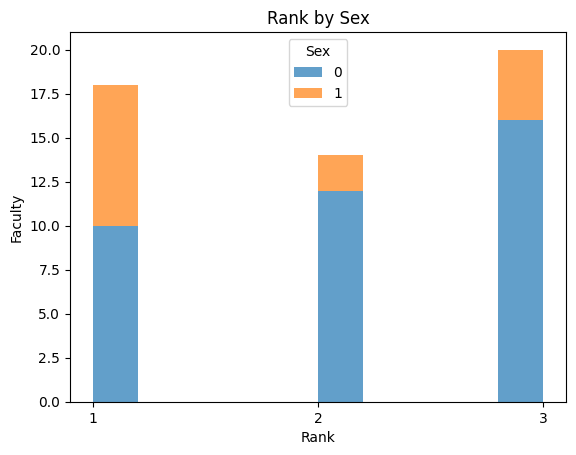

In [32]:
dataset.pivot_table(index=dataset.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

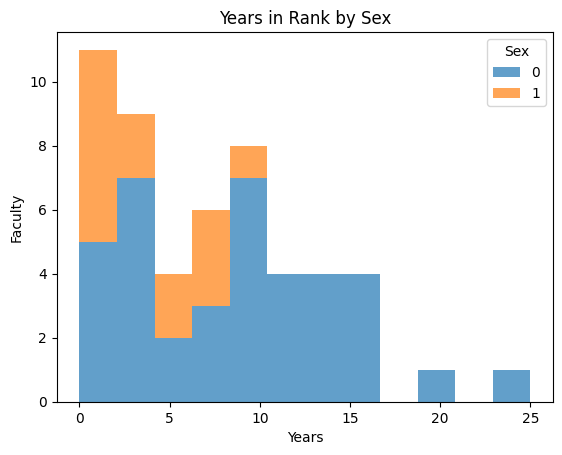

In [33]:
dataset.pivot_table(index=dataset.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

In [34]:
dataset_10 = dataset[dataset['Year'] <= 10]

In [35]:
combos_10 = get_combos(salary_discrim_cols)
combo_10_scores = all_combo_scores(combos_10, dataset_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7968248819660302, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7872092866034841, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.7857914167129874, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7812953737007231, ('Rank', 'Year', 'YSdeg')),
 (0.7811304025138202, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.7809344717080976, ('Sex', 'Rank', 'Year')),
 (0.7783076155381674, ('Rank', 'Year', 'Degree')),
 (0.778125545829645, ('Rank', 'Year')),
 (0.7267866959953192, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7266289950954575, ('Sex', 'Rank', 'Degree')),
 (0.7263171650507368, ('Rank', 'Degree', 'YSdeg')),
 (0.7262952984826756, ('Rank', 'Degree')),
 (0.7237917566538923, ('Sex', 'Rank', 'YSdeg')),
 (0.7237599305119999, ('Rank', 'YSdeg')),
 (0.7224004990910746, ('Sex', 'Rank')),
 (0.7221603677648399, ('Rank',)),
 (0.5211388967522836, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.5106317178170396, ('Year', 'Degree', 'YSdeg')),
 (0.4758242220448202, ('Sex', 'Degree', 'YSdeg')),
 (0.46515893607776615, ('Sex', 'Year',

In [ ]:
Again, we see that Sex has no direct influence on Salary: score of 0.0068777005613497311.

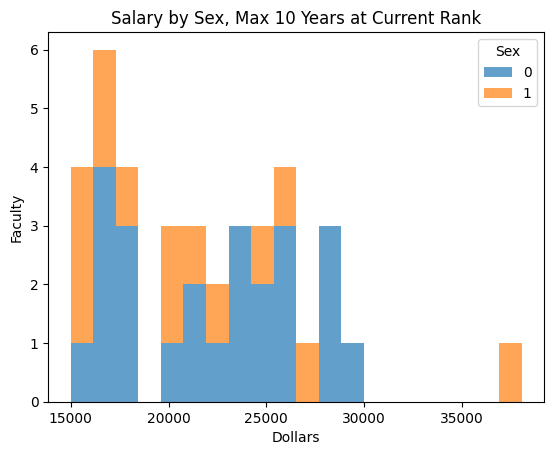

In [36]:
dataset_10.pivot_table(index=dataset_10.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20,
          title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

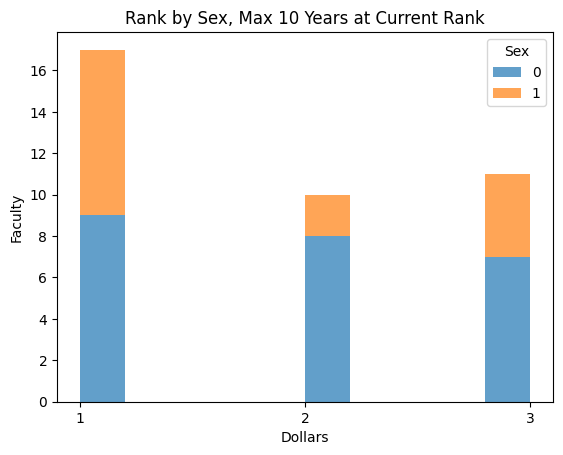

In [37]:
dataset_10.pivot_table(index=dataset_10.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, 
          title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

In [38]:
rank_discrim_cols = ['Sex', 'Year', 'Degree', 'YSdeg']
combos_rank = get_combos(rank_discrim_cols)
combo_rank_scores = all_combo_scores(combos_rank, dataset_10, 'Rank')
sorted(combo_rank_scores.items(), key=lambda c: c[0], reverse=True)

[(0.6684776318082725, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6650836168279377, ('Sex', 'Degree', 'YSdeg')),
 (0.6123237979933462, ('Year', 'Degree', 'YSdeg')),
 (0.6121040013037697, ('Degree', 'YSdeg')),
 (0.5169568608935469, ('Sex', 'Year', 'YSdeg')),
 (0.5169178279759162, ('Sex', 'YSdeg')),
 (0.4848731472423393, ('Year', 'YSdeg')),
 (0.48257642674080226, ('YSdeg',)),
 (0.17754355818252254, ('Sex', 'Year', 'Degree')),
 (0.17641648396278564, ('Sex', 'Year')),
 (0.1761306214861189, ('Year', 'Degree')),
 (0.17502353196257248, ('Year',)),
 (0.016344674690073613, ('Sex', 'Degree')),
 (0.013387066889012145, ('Sex',)),
 (0.0036042103162726713, ('Degree',))]

In [ ]:
Even looking at the influencers of Rank, looking only at those who have been at their present rank for 10 years or less, there is no correlation with Sex. 
There is no salary discrimination by Sex.